*tildes omitidas*

# <p style='text-align: center;'> Regresion Logistica  </p>
<p style='text-align: left;'> **Victor Acevedo** </p>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import scipy.stats as scis

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [ ]:
#Examinamos la ruta por default
os.getcwd()
#os.chdir(ruta)

In [ ]:
?os.makedirs

In [ ]:
#Creamos un directorio
os.makedirs('./base', exist_ok = True)

In [2]:
#Previamente hemos guardado un csv en la ruta creada y ahora lo cargamos
dataset = pd.read_csv('./base/ventaCEF.csv')

In [ ]:
#Examinamos las columnas
list(dataset.columns)

In [ ]:
print(type(dataset))
dataset.dtypes

In [ ]:
#Examinamos los primeros 5 registros
dataset.head()

In [ ]:
sum(dataset['Ingreso'].isnull())

In [ ]:
print('Para el caso del campo ingreso existen ' + str(sum(dataset['Ingreso'].isnull())) + ' nulos')

In [ ]:
dataset.groupby('Sexo').count()['DNI']/len(dataset)

In [ ]:
dataset.hist(column=['Edad', 'Ingreso'], grid=False)

**Outliers**

In [ ]:
#Primero veamos algunos estadisticos
#Para seleccionar algunos campos se puede usar: dataset.iloc[:,[2, 3]].columns
for variable in ["Edad", "Deuda", "Ingreso"]:
    print('Promedio de ' + variable + ' redondeado a 1 decimal')
    print(round(dataset[variable].mean(), 1))

In [ ]:
print('El porcentaje de venta es '+ '{:.1%}'.format(dataset['Venta'].mean()))

**1.** Enfoque univariado

In [ ]:
#Veamos los percentiles
for variable in dataset.columns:
    if dataset[variable].dtypes in ('int', 'float'):
        print("\n" + variable)
        print(np.quantile(dataset[variable].values, np.arange(0,1,0.1)))
        print(dataset.hist(column=[variable]))
    else:
        print("\n La variable " + variable + " no es numerica")

In [ ]:
dataset = pd.read_csv('./base/ventaCEF.csv')

In [3]:
exogenas = list(dataset.columns)
exogenas = [elemento for elemento in exogenas if elemento not in ('DNI', 'Venta')]

In [ ]:
exogenas

In [4]:
for variable in exogenas:
    if dataset[variable].dtypes in ('int', 'float'):
        p99 = np.quantile(dataset[variable].values,0.99)
        maxVal = max(dataset[variable])
        print('\nPara la variable ' + variable)
        print('\nOriginalmente el valor maximo es ' + str(maxVal))
        print('Originalmente el percentile 99 es ' + str(p99))
        dataset.loc[dataset[variable]>=p99, variable]=p99
        print('Ahora el valor maximo es ' + str(max(dataset[variable])))


Para la variable Ingreso

Originalmente el valor maximo es 150000
Originalmente el percentile 99 es 148009.99999999997
Ahora el valor maximo es 148009.99999999997

Para la variable Edad

Originalmente el valor maximo es 59
Originalmente el percentile 99 es 59.0
Ahora el valor maximo es 59.0

Para la variable Deuda

Originalmente el valor maximo es 22499985000
Originalmente el percentile 99 es 21906954999.999996
Ahora el valor maximo es 21906954999.999996

Para la variable Cliente

Originalmente el valor maximo es 1
Originalmente el percentile 99 es 1.0
Ahora el valor maximo es 1.0


**2.** Enfoque multivariado

In [ ]:
?LOF.fit_predict

In [ ]:
#Examinemos outliers 
datasetOut = dataset[["Edad", "Ingreso"]]
LOF = LocalOutlierFactor(n_neighbors=20)
y_pred = LOF.fit_predict(datasetOut)

In [ ]:
#Calculamos el score de outlier: mayor a 1, se dice que es outlier
X_scores = LOF.negative_outlier_factor_

In [ ]:
#Vemos el tipo de dato
type(X_scores)

In [ ]:
#Anadimos el campo a nuestra tabla
dataset['LOFscore'] = X_scores

In [ ]:
#Examinamos si hay  outliers según LOF
print(np.quantile(dataset.LOFscore, np.arange(0,1,0.1)))
dataset.hist(column=['LOFscore'])

In [ ]:
#Veamos el score aplicado a cada observacion
fig = plt.figure()
plt.scatter(dataset["Edad"].values,dataset["Ingreso"].values,c=dataset["LOFscore"])
plt.colorbar()

Analisis bivariado de las variables

In [ ]:
dataset.columns

In [6]:
datasetDumm = pd.get_dummies(dataset)

In [ ]:
dataset.head()

In [ ]:
datasetDumm.head()

In [29]:
X = datasetDumm.loc[:,['Ingreso', 'Sexo_F', 'Edad', 'TipoVivienda_Alquilada', 'TipoVivienda_Propia', 'Deuda', 'Cliente']]
y = datasetDumm.loc[:,['Venta']]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


jitter nos permite la no superposicion entre ceros/unos. Mientras mas cercano a cero, mas superposicion


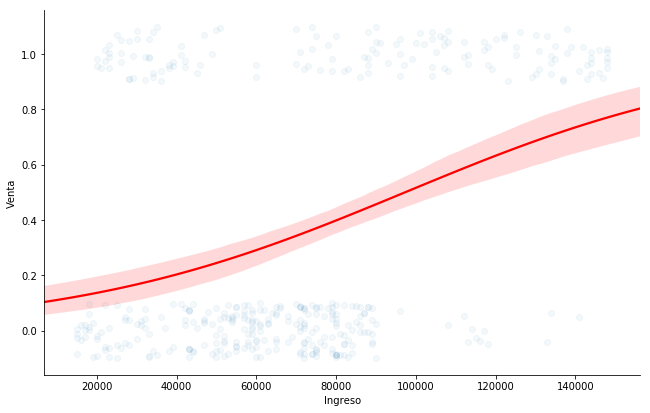

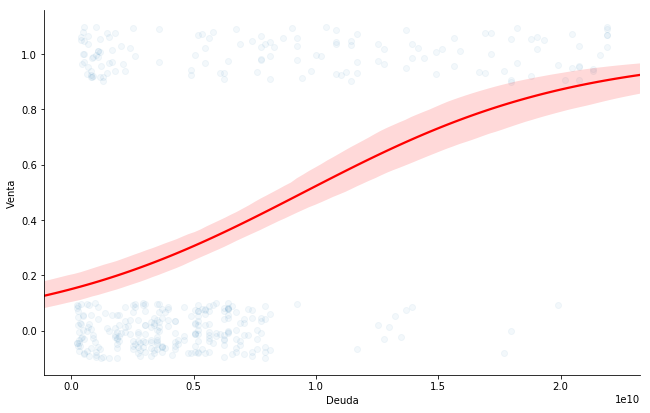

In [8]:
fg = sns.lmplot(x='Ingreso', y='Venta', data=datasetDumm, y_jitter=0.1, x_jitter=0.1, logistic=True, scatter_kws={'alpha':0.05}, line_kws={'color':'red'})
fg.fig.set_size_inches(10,6)
fg = sns.lmplot(x='Deuda', y='Venta', data=datasetDumm, y_jitter=0.1, x_jitter=0.1, logistic=True, scatter_kws={'alpha':0.05}, line_kws={'color':'red'})
fg.fig.set_size_inches(10,6)
print("jitter nos permite la no superposicion entre ceros/unos. Mientras mas cercano a cero, mas superposicion")

In [ ]:
#LabelEncoder.inverse_transform() can be used to get the original data back.

In [ ]:
#le_sexo = LabelEncoder()
#le_vivienda = LabelEncoder()
#X[:, 1] = le_sexo.fit_transform(X[:, 1])
#X[:, 3] = le_vivienda.fit_transform(X[:, 3])

In [ ]:
#le_sexo_mapping = dict(zip(le_sexo.classes_, le_sexo.transform(le_sexo.classes_)))
#print(le_sexo_mapping)
#le_vivienda_mapping = dict(zip(le_vivienda.classes_, le_vivienda.transform(le_vivienda.classes_)))
#print(le_vivienda_mapping)

In [ ]:
#onehotencoder = CategoricalEncoder(categorical_features = [1])
#X = CategoricalEncoder.fit_transform(X).toarray()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train.corr()

,Ingreso,Sexo_F,Edad,TipoVivienda_Familiar,TipoVivienda_Propia,Deuda,Cliente
Ingreso,1.000000,0.061085,0.164451,0.076854,0.804294,0.970301,0.077027
Sexo_F,0.061085,1.000000,0.095875,-0.068388,0.082331,0.071270,0.116190
Edad,0.164451,0.095875,1.000000,-0.058736,0.152434,0.179148,0.809436
TipoVivienda_Familiar,0.076854,-0.068388,-0.058736,1.000000,-0.338141,-0.040354,-0.060821
TipoVivienda_Propia,0.804294,0.082331,0.152434,-0.338141,1.000000,0.826185,0.109832
Deuda,0.970301,0.071270,0.179148,-0.040354,0.826185,1.000000,0.102008
Cliente,0.077027,0.116190,0.809436,-0.060821,0.109832,0.102008,1.000000


In [ ]:
X_train.dtypes

In [11]:
CorrTipoVivienda = scis.chi2_contingency(pd.crosstab(X_train["TipoVivienda_Propia"], X_train["Sexo_F"]))
print(CorrTipoVivienda[0])
print(CorrTipoVivienda[1])
#Ho:no relacion

1.822632272641687
0.17700026936369165


In [17]:
logistic_regression = sm.Logit(X_train["TipoVivienda_Propia"],sm.add_constant(X_train['Deuda']))
result = logistic_regression.fit()
print(result.summary())

         Current function value: -0.000000
         Iterations: 35


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


LinAlgError: Singular matrix

In [12]:
for variable in ['Ingreso', 'Edad', 'Deuda']:
    logistic_regression = sm.Logit(X_train["TipoVivienda_Propia"],sm.add_constant(X_train[variable]))
    result = logistic_regression.fit()
    print(result.summary())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


PerfectSeparationError: Perfect separation detected, results not available

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


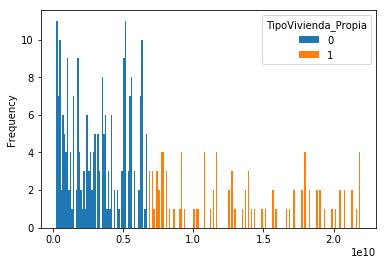

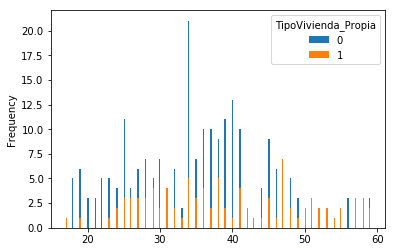

In [18]:
print(X_train.pivot(columns="TipoVivienda_Propia", values="Deuda").plot.hist(bins=200))
print(X_train.pivot(columns="TipoVivienda_Propia", values="Edad").plot.hist(bins=200))

In [19]:
print(X_train.groupby("TipoVivienda_Propia")["Deuda"].min())
print(X_train.groupby("TipoVivienda_Propia")["Deuda"].max())

TipoVivienda_Propia
0    2.249850e+08
1    6.888985e+09
Name: Deuda, dtype: float64
TipoVivienda_Propia
0    6.723985e+09
1    2.190695e+10
Name: Deuda, dtype: float64


In [31]:
logistic_regression = sm.Logit(y_train,sm.add_constant(X_train))
result = logistic_regression.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.290221
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Venta   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Thu, 18 Jul 2019   Pseudo R-squ.:                  0.5580
Time:                        02:24:33   Log-Likelihood:                -92.871
converged:                       True   LL-Null:                       -210.11
                                        LLR p-value:                 5.560e-47
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.4009      1.953     -2.253      0.024      -8.229      

In [21]:
print('El pseudo R2 relaciona los logs de las funciones',
      'de verosimilitud del modelo saturado y nulo', sep="\n") 
round(1- (-92.871/-210.11),4)

El pseudo R2 relaciona los logs de las funciones
de verosimilitud del modelo saturado y nulo


0.558

In [ ]:
#classifier = LogisticRegression(random_state = 0)

In [22]:
y_pred = result.predict(sm.add_constant(X_test))

In [ ]:
type(y_pred)

In [23]:
gini = (roc_auc_score(y_test, y_pred) -0.5)*2

In [24]:
gini

0.9615384615384615

In [25]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 

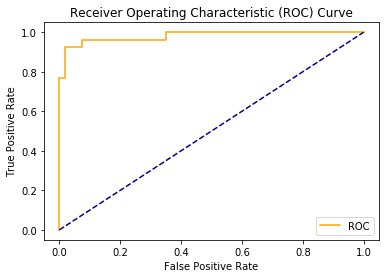

In [27]:
os.makedirs('./clase2RegLog', exist_ok = True)
fig = plt.figure()
plot_roc_curve(fpr, tpr)
fig.savefig('./clase2RegLog/ROC.png')

In [28]:
y_predCategorical = np.where(y_pred < 0.5,0,1)

In [ ]:
#X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
#                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 100))

#1351*4400

#np.array([X1.ravel(), X2.ravel()]).T.shape

#result.predict(sm.add_constant(np.array([X1.ravel(), X2.ravel()]).T)).shape

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predCategorical)

In [ ]:
cm

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 100))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predCategorical)

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 100))
fig = plt.figure()
plt.contourf(X1, X2, result.predict(sm.add_constant(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
fig.savefig('./clase2RegLog/regLogMLG.png')
plt.show()

In [ ]:
df_resultados = pd.DataFrame({'Edad' : X_test[:,0],
                             'Ingreso' : X_test[:,1],
                             'Prediccion' : y_pred,
                             'PredCategoria' : y_predCategorical})

In [ ]:
df_resultados.head()

In [ ]:
df_resultados.to_csv('./clase2RegLog/predRegLogVentas.csv')